In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


In [47]:
def convolve2dManual(image, kernel:np.ndarray):
    """
    Apply a 2D convolution operation on an image using a given 3x3 kernel.
    """
    # Get image dimensions
    img_height, img_width = image.shape

    # Get kernel size
    k_height, k_width = kernel.shape
    pad = k_height // 2  # Padding to keep the same size

    # Pad the image with zeros (zero-padding)
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)

    # Create an output image
    output = np.zeros((img_height, img_width))

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+k_height, j:j+k_width]  # Extract region
            output[i, j] = np.sum(region * kernel)  # Element-wise multiplication and sum

    return output

def convolveImage(image, kernel):
    """
    Apply a 2D convolution operation on an image using SciPy's convolve2d function.
    """
    return convolve2d(image, kernel, boundary='fill', fillvalue=0)

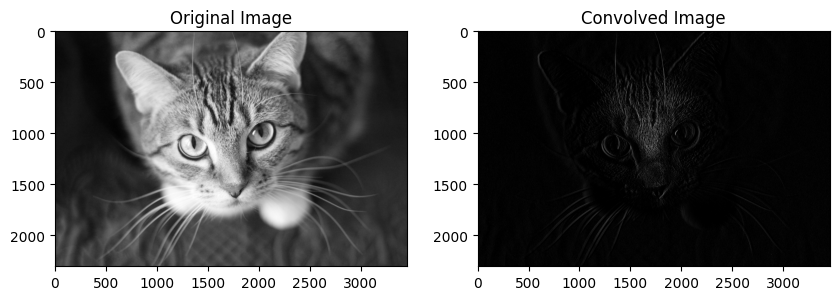

In [55]:

# Load grayscale image
image = cv2.imread("cat_test1.jpg", cv2.IMREAD_GRAYSCALE)

# basic edge detection
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Define a 3x3 kernel (Edge detection - Sobel X)
# kernel = np.array([
#     [-1, 0, 1],
#     [-2, 0, 2],
#     [-1, 0, 1]
# ])
# Apply convolution
convolved_image = convolveImage(image, kernel)

# Normalize and convert back to uint8
convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)

# Display original and convolved images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap='gray')

## 6x6 * 3x3 = 4x4 (same as what is shown in beginning of CNN course of DLS by Andrew Ng)

In [58]:
convolve2d(np.random.randn(6,6), kernel,mode="valid").shape

(4, 4)